#ECE 595 Machine Learning II
#Project 2: Autoencoders - Solution Code

In [ ]:
#Import necessary packages
import numpy as np
from keras.datasets import mnist
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras import backend as K

Using TensorFlow backend.


#Part 0: Importing and Normalizing Data

In [ ]:
#Load MNIST data and normalize to [0,1]
(data_train, _), (data_test, _) = mnist.load_data()
data_train = data_train/255.0
data_test = data_test/255.0

11501568/11490434 [==============================] - 1s 0us/step


#Part 1: Deep Fully-Connected AutoEncoder

Answer the following questions: 


1.  We want to predict output values of the intensity of the pixels which are between 0 to 1. Therefore choice of output layer activation function is important. (Open ended reasoning question). (a) Choose 'softmax’ or ‘sigmoid’. Reason why one is preferred over the other.

  ANS: Softmax layer increases the difference between two or multiple output neuron values by taking there exponential and normalizing it.  This helps the optimizer by having the larger loss values during training, so that the gradients do not vanish until training loss is very low. This behavior is essential in classification, when one output needs to dominate all others.  

  But in case of auto-encoders, there is no competition between output neurons and this is not a classification task either. Here, the output neuron needs to predict pixel intensity based on the input, “independent” of other neurons. Sigmoid is a great choice for this task since we need to predict values between 0 to 1 and “independent” of other neurons.  
  
  

2.   remove later 

  ANS: When

In [ ]:
#Reshape training and testing data into 784-dimensional vectors
data_train_reshape_fcae = data_train.reshape((60000, 784))
data_test_reshape_fcae = data_test.reshape((10000, 784))

In [ ]:
# Create autoencoder architecture
def deep_ae():
    model = Sequential()
    
    # Encoder
    model.add(Dense(400, activation=None, use_bias=True, kernel_initializer="uniform", input_dim=784))
    model.add(Dense(200, activation=None, kernel_initializer="uniform"))
    model.add(Dense(100, activation=None, kernel_initializer="uniform"))
    
    # Decoder
    model.add(Dense(200, activation=None, kernel_initializer="uniform"))
    model.add(Dense(400, activation=None, kernel_initializer="uniform"))
    model.add(Dense(784, activation="sigmoid", kernel_initializer="uniform"))
    return model

#Create deep autoencoder graph, compile it to use mean squared error loss and the adam optimizer, train the model, create predictions
deep_ae = deep_ae()
deep_ae.compile(loss='mean_squared_error', optimizer='adam') ## Try loss='binary_crossentropy' which is binary cross entropy loss for part []
history_deep_ae = deep_ae.fit(data_train_reshape_fcae, data_train_reshape_fcae, validation_data=(data_test_reshape_fcae, data_test_reshape_fcae), epochs=150, batch_size=250, shuffle=True)
decoded_data = deep_ae.predict(data_test_reshape_fcae)

#Obtain encoder representation of data
get_hl = K.function([deep_ae.layers[0].input], [deep_ae.layers[2].output])
deep_ae_hl = get_hl([data_test_reshape_fcae])[0]

Train on 60000 samples, validate on 10000 samples
Epoch 1/150
60000/60000 [==============================] - 2s 28us/step - loss: 0.2493 - val_loss: 0.1806
Epoch 2/150
60000/60000 [==============================] - 2s 25us/step - loss: 0.1667 - val_loss: 0.1489
Epoch 3/150
60000/60000 [==============================] - 1s 23us/step - loss: 0.1394 - val_loss: 0.1256
Epoch 4/150
60000/60000 [==============================] - 1s 24us/step - loss: 0.1227 - val_loss: 0.1169
Epoch 5/150
60000/60000 [==============================] - 1s 22us/step - loss: 0.1145 - val_loss: 0.1082
Epoch 6/150
60000/60000 [==============================] - 1s 22us/step - loss: 0.1066 - val_loss: 0.1020
Epoch 7/150
60000/60000 [==============================] - 1s 24us/step - loss: 0.1014 - val_loss: 0.0978
Epoch 8/150
60000/60000 [==============================] - 1s 23us/step - loss: 0.0978 - val_loss: 0.0946
Epoch 9/150
60000/60000 [==============================] - 2s 25us/step - loss: 0.0948 - val_loss: 0.0

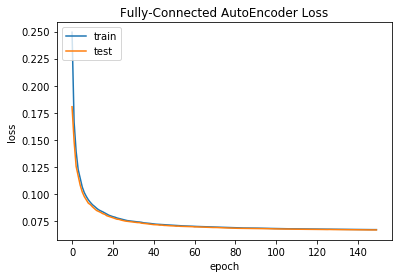

In [ ]:
#Plot loss vs epoch  for BCE and MSE  [Together or separate, Both accepted]
plt.plot(history_deep_ae.history['loss'])
plt.plot(history_deep_ae.history['val_loss'])
plt.title('Fully-Connected AutoEncoder Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

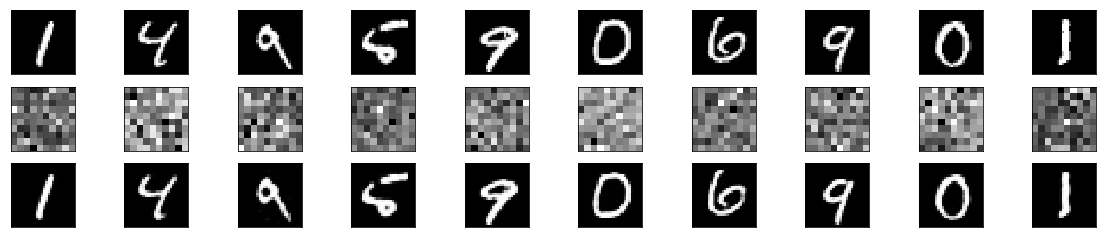

In [ ]:
#Plot samples of 10 images, their hidden layer representations, and their reconstructions
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(data_test_reshape_fcae[i+5].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display hidden layer representation
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(deep_ae_hl[i+5].reshape(10, 10))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + n + n)
    plt.imshow(decoded_data[i+5].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Answer the following questions: 


1.  Question 2c: BONUS [reasoning question]: Pair the output layer activation and loss function which performs better together. Linear, sigmoid, Binary cross entropy and Mean Square error

  ANS: Pair 1:: MSE and Linear,   Pair 2:: Binary Cross entropy and sigmoid
 
2.  Question 5: Which loss function is better and why?

  ANS: In the output images, when MSE is used, there are output pixels which are active even if the original image does not. Hence poor reconstruction. 

  Binary cross_entropy detects these small variations and removes them. It again relates to the loss and gradients while training. Loss value is larger in case of Binary_cross_entropy whenever there exists difference between output value and desired value, compared to the MSE. This help gradients not to vanish and train the network to reduce the training loss further. This might cause overfitting, but early stopping can prevent this over fitting. 

3.  Question 6: If we were to predict pixels values [0 to 255] directly at the output of last layer. Should there be an activation function in last later?  If yes, which activation function and why?,  If No, reason why?

  ANS: If there is no activations function at the output layer, the output is not restricted between any range. Hence the values 0 to 255 can be predicted if we have last layer as a linear layer without any activation function. 

#Part 2: Deep Convolutional AutoEncoder

In [ ]:
#Reshape data to account for grayscale channel in each image
data_train_reshape_cae = data_train.reshape(60000, 28, 28, 1)
data_test_reshape_cae = data_test.reshape(10000, 28, 28, 1)

In [ ]:
#Create Convolutional AutoEncoder Architecture
def cae():
    model = Sequential()

    #Encoder
    model.add(Conv2D(16, kernel_size=3, activation=None, padding="same", input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2), padding="same"))
    model.add(Conv2D(8, kernel_size=3, activation=None, padding="same"))
    model.add(MaxPooling2D((2, 2), padding='same'))

    #Decoder
    model.add(Conv2D(8, (3, 3), activation=None, padding='same'))
    model.add(UpSampling2D((2, 2)))
    model.add(Conv2D(16, (3, 3), activation=None, padding='same'))
    model.add(UpSampling2D((2, 2)))
    model.add(Conv2D(1, (3, 3), activation='sigmoid', padding='same'))
    return model

#Create deep autoencoder graph, compile it to use mean squared error loss and the adam optimizer, train the model, create predictions
conv_ae = cae()
print(conv_ae.model.summary())
conv_ae.compile(loss='mean_squared_error', optimizer='adam') ## Try loss='binary_crossentropy' which is binary cross entropy loss for part []
history_conv_ae = conv_ae.fit(data_train_reshape_cae, data_train_reshape_cae, validation_data=(data_test_reshape_cae, data_test_reshape_cae), epochs=150, batch_size=250, shuffle=True)
decoded_data = conv_ae.predict(data_test_reshape_cae)

#Obtain encoder representation of data
get_hl = K.function([conv_ae.layers[0].input], [conv_ae.layers[3].output])
conv_ae_hl = get_hl([data_test_reshape_cae])[0]

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
up_sampling2d_3 (UpSampling2 (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 16)       

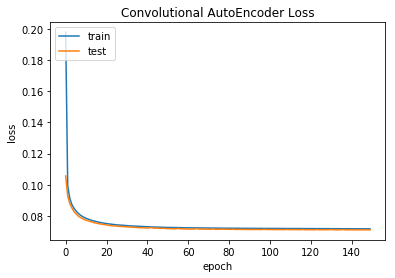

In [ ]:
#Plot loss vs epoch for BCE and MSE [Together or separate, Both accepted]
plt.plot(history_conv_ae.history['loss'])
plt.plot(history_conv_ae.history['val_loss'])
plt.title('Convolutional AutoEncoder Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<Figure size 432x288 with 0 Axes>

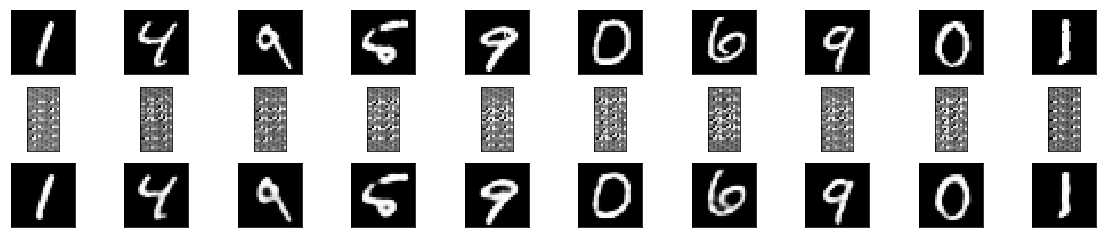

In [ ]:
#Plot samples of 10 images, their hidden layer representations, and their reconstructions
n = 10  # how many digits we will display
plt.figure(3)
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(data_test_reshape_cae[i+5].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display hidden layer representation
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(conv_ae_hl[i+5].reshape(28, 14))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + n + n)
    plt.imshow(decoded_data[i+5].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Answer the following questions: 


1.  Question 4: Which loss function is better and why?

  ANS: In the output images, when MSE is used, there are output pixels which are active even if the original image does not. Hence poor reconstruction. 

  Binary cross_entropy detects these small variations and removes them. It again relates to the loss and gradients while training. Loss value is larger in case of Binary_cross_entropy whenever there exists difference between output value and desired value, compared to the MSE. This help gradients not to vanish and train the network to reduce the training loss further. This might cause overfitting, but early stopping can prevent this over fitting.  

#Part 3: Denoising AutoEncoder

In [ ]:
#Reshape data to fit dimensions of convolutional autoencoder from part 2
data_train_reshape_cdae = data_train.reshape(60000, 28, 28, 1)
data_test_reshape_cdae = data_test.reshape(10000, 28, 28, 1)

#Inject noise into training and testing data
noise_factor = 0.25
data_train_noisy = data_train_reshape_cdae + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=data_train_reshape_cdae.shape)
data_test_noisy = data_test_reshape_cdae + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=data_test_reshape_cdae.shape)

#Clip to stay within valid (normalized) pixel range
data_train_noisy = np.clip(data_train_noisy, 0., 1.)
data_test_noisy = np.clip(data_test_noisy, 0., 1.)

#Create dataset containing clean and noisy inputs
data_total_train = np.vstack([data_train_reshape_cdae, data_train_noisy])
data_total_test = np.vstack([data_test_reshape_cdae, data_test_noisy])

#Create correspnding clean inputs only
labels_total_train = np.vstack([data_train_reshape_cdae, data_train_reshape_cdae])
labels_total_test = np.vstack([data_test_reshape_cdae, data_test_reshape_cdae])

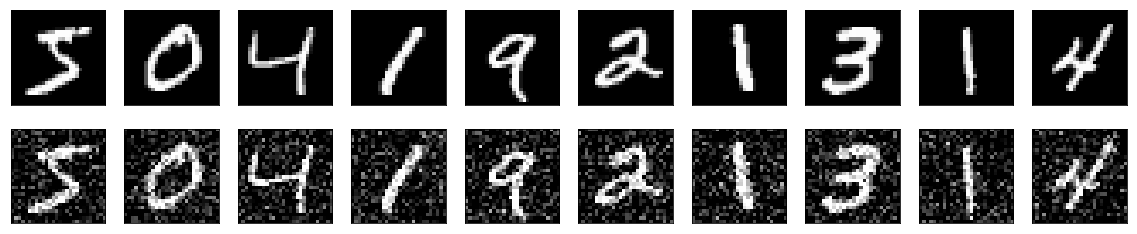

In [ ]:
#Plot samples of 10 original images and their corrsponding noisy counterparts from the training set
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(data_total_train[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display noisy image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(data_total_train[i+60000].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [ ]:
#Train architecture with clean and noisy images and corresponding clean images
cdae = cae()
cdae.compile(loss='binary_crossentropy', optimizer='adam')
history_cdae = cdae.fit(data_total_train, labels_total_train, validation_data=(data_total_test, labels_total_test), epochs=150, batch_size=250, shuffle=True)
decoded_data = cdae.predict(data_total_test)

Train on 120000 samples, validate on 20000 samples
Epoch 1/150
120000/120000 [==============================] - 9s 74us/step - loss: 0.1573 - val_loss: 0.0997
Epoch 2/150
120000/120000 [==============================] - 8s 66us/step - loss: 0.0968 - val_loss: 0.0924
Epoch 3/150
120000/120000 [==============================] - 8s 64us/step - loss: 0.0917 - val_loss: 0.0888
Epoch 4/150
120000/120000 [==============================] - 8s 64us/step - loss: 0.0889 - val_loss: 0.0866
Epoch 5/150
120000/120000 [==============================] - 8s 64us/step - loss: 0.0872 - val_loss: 0.0854
Epoch 6/150
120000/120000 [==============================] - 8s 63us/step - loss: 0.0860 - val_loss: 0.0845
Epoch 7/150
120000/120000 [==============================] - 8s 64us/step - loss: 0.0852 - val_loss: 0.0837
Epoch 8/150
120000/120000 [==============================] - 8s 64us/step - loss: 0.0845 - val_loss: 0.0832
Epoch 9/150
120000/120000 [==============================] - 8s 64us/step - loss: 0.0

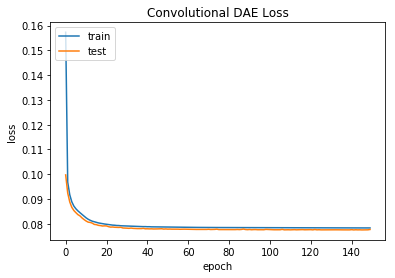

In [ ]:
#Plot loss vs epoch
plt.plot(history_cdae.history['loss'])
plt.plot(history_cdae.history['val_loss'])
plt.title('Convolutional DAE Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

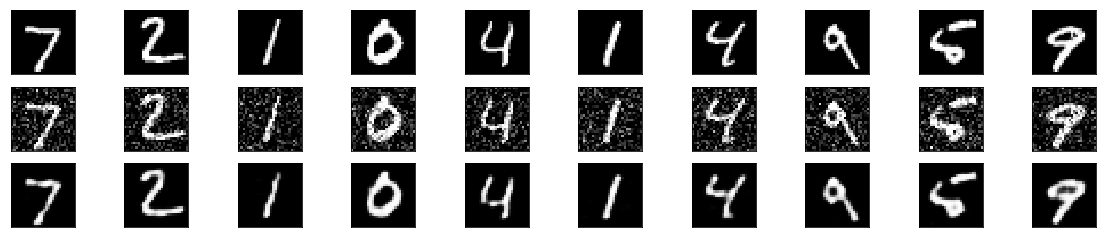

In [ ]:
#Plot samples of 10 original images, their noisy counterparts, and their de-noised images from the testing set
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(data_total_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display noisy image
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(data_total_test[i+10000].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #Display reconstruction
    ax = plt.subplot(3, n, i + 1 + n + n)
    plt.imshow(decoded_data[i+10000].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()